In [4]:
import astropy.io.fits as pf
data = pf.open('example.fits')

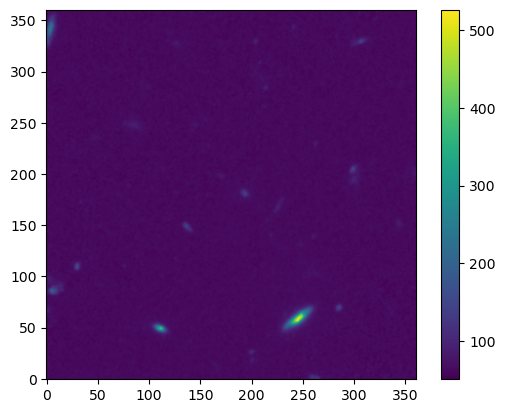

In [75]:
import matplotlib.pyplot as plt
plt.imshow(data[0].data,origin='lower')
plt.colorbar()

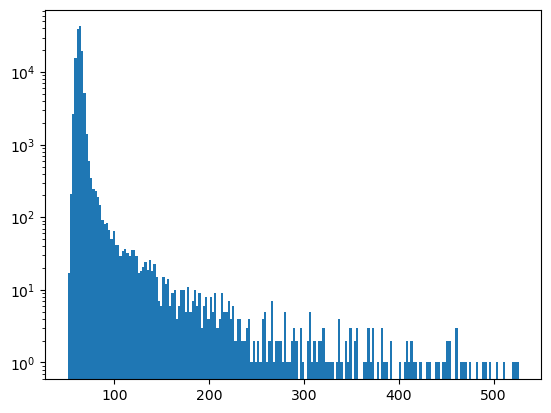

In [69]:
pixel = data[0].data.flatten()
plt.hist(pixel,bins=200,log=True);
plt.show()

In [71]:
def sigma_clip_iter(img, sigma=3.0, tol=1e-3, maxiters=2000):
    """
    Iterative 3-sigma clipping until standard deviation converges within tolerance.
    What is "sigma clipping": https://docs.astropy.org/en/latest/stats/robust.html
    
    Parameters
    ----------
    img : 2D image that you wish to remove sources from.
    sigma : Clipping threshold (default 3).
    tol : Fractional tolerance for std change (default 0.1%).
    maxiters : Safety cap on iterations, can be set to 50000 or something if you want.

    Returns
    -------
    mean, median, std : Background statistics after convergence.
    mask2d: The masked image
    """
    arr = img[np.isfinite(img)].ravel()
    mask2d = np.zeros_like(img, dtype=bool)

    prev_std = np.std(arr)

    for _ in range(maxiters):
        mean = np.mean(arr)
        std  = np.std(arr)

        this_mask = (img < mean - sigma*std) | (img > mean + sigma*std)
        mask2d |= this_mask

        arr = img[~mask2d & np.isfinite(img)]
        new_std = np.std(arr)

        if abs(new_std - prev_std) / prev_std < tol:
            break
        prev_std = new_std

    return np.mean(arr), np.median(arr), new_std, mask2d

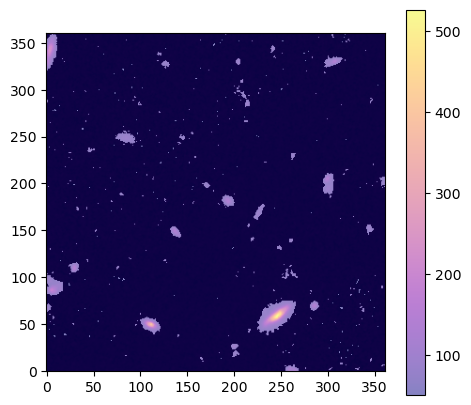

63.01534 62.963535 2.5442667


In [159]:
mean, median, std, mask = sigma_clip_iter(data[0].data,tol=1e-3)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(mask, origin="lower", cmap="gray")
plt.imshow(data[0].data, origin="lower", cmap="plasma",alpha=0.5)
plt.colorbar()
plt.show()
print(mean,median,std)

In [83]:
S, B, D, F = pf.open('S.fits')[0].data,pf.open('B.fits')[0].data,pf.open('D.fits')[0].data,pf.open('F.fits')[0].data

In [93]:
def phi(S,B=B,D=D,F=F,T=100): #Just in case S needs to be changed
    phi = ((S-B)/T-D)/F
    return phi

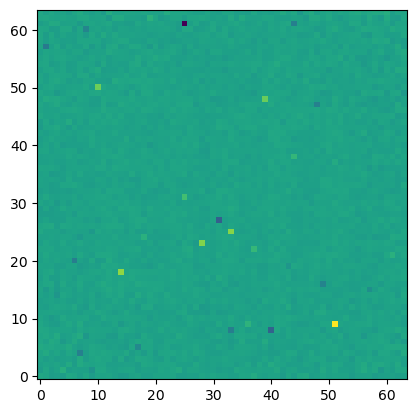

In [143]:
plt.imshow(phi(S),origin='lower')
plt.show()

In [137]:
S_list = [pf.getdata(f"S{i}.fits") for i in range(1, 8)]
phi_list = [phi(S) for S in S_list]
phi_list.append(phi(S))

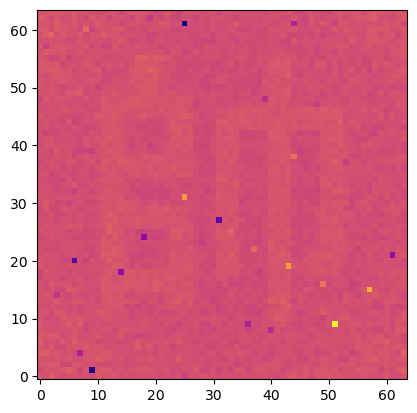

In [157]:
plt.imshow(np.mean(phi_list,axis=0),origin='lower',cmap='plasma')
plt.show()

I know I am very handsome - TA.